In [2]:
import pandas as pd

nodes = pd.read_csv('nodes.tsv',sep='\t')
edges = pd.read_csv('edges.tsv',sep='\t')

In [12]:
kg = nodes.drop(columns=['Description','Sequence']).merge(edges, left_on='name', right_on='subject').drop(columns=['name']).rename(
    columns={'type':'subject_type'}) 
kg = nodes.drop(columns=['Description','Sequence']).merge(kg, left_on='name', right_on='object').drop(columns=['name']).rename(
    columns={'type':'object_type'}) 
kg

object_type subject_type   
0         Phenotype    Phenotype  \
1         Phenotype    Phenotype   
2         Phenotype    Phenotype   
3         Phenotype    Phenotype   
4         Phenotype    Phenotype   
...             ...          ...   
1560712        Gene        miRNA   
1560713        Gene        miRNA   
1560714        Gene        miRNA   
1560715        Gene        miRNA   
1560716        Gene        miRNA   

                                               subject   
0            http://purl.obolibrary.org/obo/HP_0031153  \
1            http://purl.obolibrary.org/obo/HP_0007968   
2            http://purl.obolibrary.org/obo/HP_0100832   
3            http://purl.obolibrary.org/obo/HP_0007710   
4            http://purl.obolibrary.org/obo/HP_0030672   
...                                                ...   
1560712  https://rnacentral.org/rna/URS0000554A4F_9606   
1560713  https://rnacentral.org/rna/URS000075D73F_9606   
1560714  https://rnacentral.org/rna/URS0000D55DFB_9606   
1560715  https://rnacentral.org/rna/URS000055128B_9606   
1560716  https://rnacentral.org/rna/URS000055128B_9606   

                                            object              predicate  
0        http://purl.obolibrary.org/obo/HP_0004327             subclassof  
1        http://purl.obolibrary.org/obo/HP_0004327             subclassof  
2        http://purl.obolibrary.org/obo/HP_0004327             subclassof  
3        http://purl.obolibrary.org/obo/HP_0004327             subclassof  
4        http://purl.obolibrary.org/obo/HP_0004327             subclassof  
...                                            ...                    ...  
1560712       http://www.ncbi.nlm.nih.gov/gene/999  regulates_activity_of  
1560713       http://www.ncbi.nlm.nih.gov/gene/999  regulates_activity_of  
1560714       http://www.ncbi.nlm.nih.gov/gene/999  regulates_activity_of  
1560715      http://www.ncbi.nlm.nih.gov/gene/9991  regulates_activity_of  
1560716      http://www.ncbi.nlm.nih.gov/gene/9994  regulates_activity_of  

[1560717 rows x 5 columns]

In [29]:
a = kg[['subject_type', 'predicate', 'object_type']].drop_duplicates()
a[(a['subject_type'] == 'Phenotype') & (a['object_type'] == 'Disease')]

subject_type          predicate object_type
590645    Phenotype       phenotype_of     Disease
590665    Phenotype  characteristic_of     Disease

In [41]:
nodes['type'].unique()

array(['Phenotype', 'Disease', 'Genomic feature', 'miRNA', 'Gene'],
      dtype=object)

In [49]:
kg.groupby(['subject_type', 'object_type', 'predicate']).size().reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True).loc[21:30]

subject_type object_type                                   predicate  count
21         Gene       miRNA                              transcribed_to   1843
22      Disease       miRNA  has_material_basis_in_germline_mutation_in   1356
23        miRNA     Disease              is_causal_germline_mutation_in   1356
24      Disease   Phenotype                         disease_has_feature    820
25        miRNA       miRNA                  genetically_interacts_with    805
26        miRNA       miRNA               in_homology_relationship_with    781
27      Disease     Disease                          has_characteristic    644
28      Disease     Disease                           characteristic_of    644
29      Disease   Phenotype                          has_characteristic    402
30    Phenotype     Disease                           characteristic_of    402

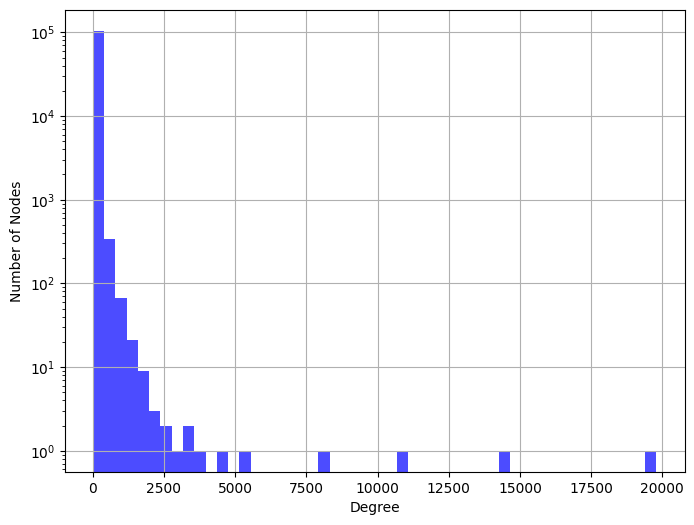

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(kg, source='subject', target='object')

degree_sequence = [d for _, d in G.degree()]

plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins=50, log=True, color='blue', alpha=0.7)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.show()